In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [128]:
pd.set_option('display.max_columns', None)

In [176]:
df = pd.read_csv("Raw_Housing_Prices.csv")
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [178]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


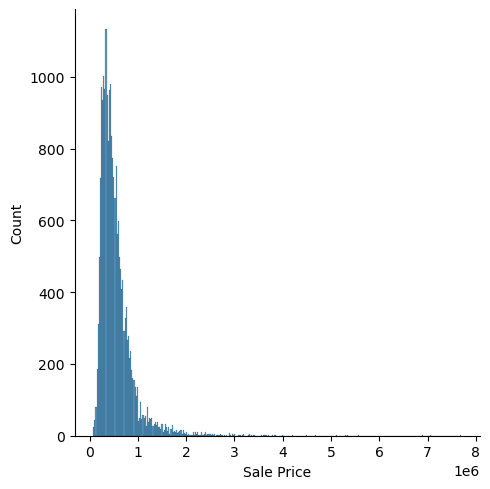

In [179]:
sns.displot(df["Sale Price"])

Fixing the not properly distributed data.

In [180]:
q1 = df["Sale Price"].quantile(0.25)
q3 = df["Sale Price"].quantile(0.75)

In [181]:
iqr = q3 - q1

In [182]:
iqr

323050.0

In [183]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(1129575.0, -162625.0)

In [184]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [185]:
df["Sale Price"] = df["Sale Price"].apply(limit_imputer)

In [186]:
df["Sale Price"].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

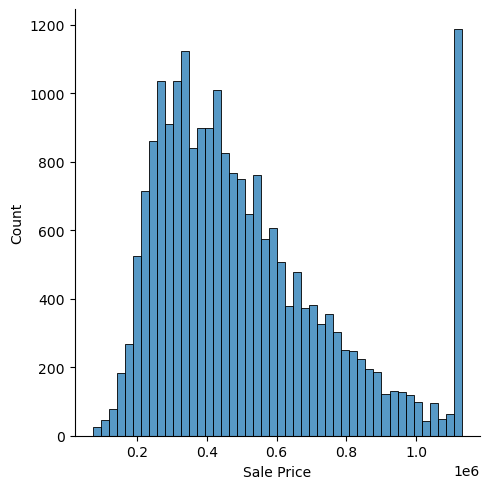

In [187]:
sns.displot(df["Sale Price"])

In [188]:
df.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

Total rows are 21613 and there are very few null values and most of them are in the numeric value so we are going to use simple imputer to get the median of and fill them

In [189]:
numerical_columns = ["No of Bathrooms","Flat Area (in Sqft)" ,"Lot Area (in Sqft)", 
                     "Area of the House from Basement (in Sqft)",
                     "Latitude", "Longitude", "Living Area after Renovation (in Sqft)"]

In [190]:
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [191]:
column = df["Zipcode"].values.reshape(-1,1)
column.shape

(21613, 1)

In [192]:
column = df["Zipcode"].values.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df["Zipcode"] = imputer.fit_transform(column)

In [193]:
df.dropna(inplace = True)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [195]:
df["No of Times Visited"].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [196]:
mapping = {'None' : "0",
           'Thrice' : "3",
           'Four' : "4",
           'Twice' : "2",
           'Once' : "1"}
df["No of Times Visited"] = df["No of Times Visited"].map(mapping)

In [197]:
df["No of Times Visited"].value_counts()

0    19485
2      963
3      510
1      332
4      319
Name: No of Times Visited, dtype: int64

Converting the Renovated year into age (years)

In [198]:
df["Ever Renovate"] = np.where(df["Renovated Year"] == 0, "No", "Yes")
# Year Since Renovation = Year of Sale - Year of Renovation

In [199]:
df["Purchase Year"] = pd.DatetimeIndex(df["Date House was Sold"]).year

In [200]:
df["Year Since Renocation"] = np.where(df["Ever Renovate"] == "Yes", abs(df["Purchase Year"] - df["Renovated Year"]), 0)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

Dropping purchase year, date house was sold and renovated year because we won't need them

In [202]:
df.drop(columns=["Purchase Year", "Date House was Sold", "Renovated Year"], inplace = True)

In [203]:
df.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate,Year Since Renocation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [204]:
df["Sale Price"].corr(df["Flat Area (in Sqft)"])

0.6951704258420672

In [205]:
np.corrcoef(df["Sale Price"], df["Flat Area (in Sqft)"])

array([[1.        , 0.69517043],
       [0.69517043, 1.        ]])

In [206]:
df["Condition of the House"].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<Axes: xlabel='Condition of the House'>

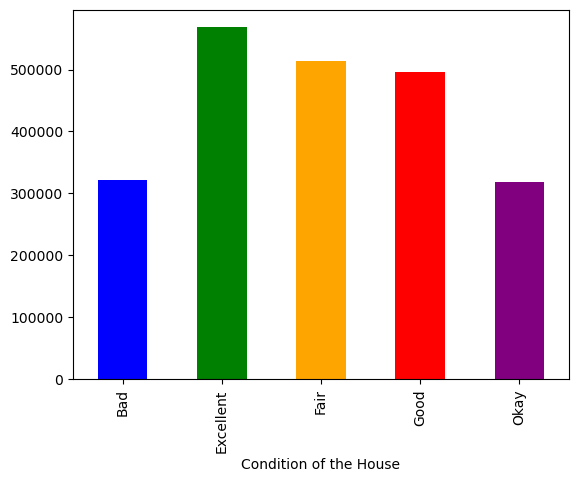

In [207]:
df.groupby("Condition of the House")["Sale Price"].mean().plot(kind = "bar", color=['blue', 'green', 'orange', 'red', 'purple'])

<Axes: xlabel='Condition of the House'>

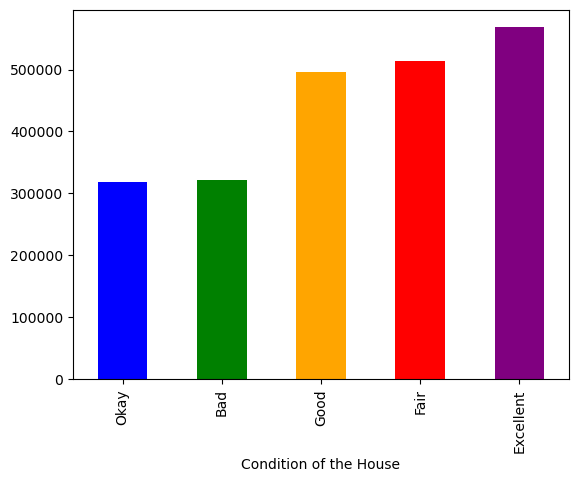

In [208]:
df.groupby("Condition of the House")["Sale Price"].mean().sort_values().plot(kind = "bar", color=['blue', 'green', 'orange', 'red', 'purple'])

In [209]:
df["Condition of the House"].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [210]:
mapping = {'Fair' : "3",
           'Excellent' : "4",
           'Good' : "2",
           'Bad' : "1",
           'Okay' : "0"}
df["Condition of the House"] = df["Condition of the House"].map(mapping)

<Axes: xlabel='Waterfront View'>

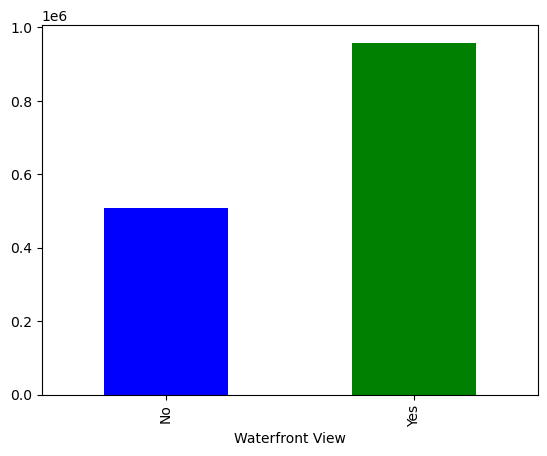

In [211]:
df.groupby("Waterfront View")["Sale Price"].mean().sort_values().plot(kind = "bar", color=['blue', 'green'])

In [212]:
mapping = {"No" : "0",
           "Yes" : "1"}
df["Waterfront View"] = df["Waterfront View"].map(mapping)

<Axes: xlabel='Ever Renovate'>

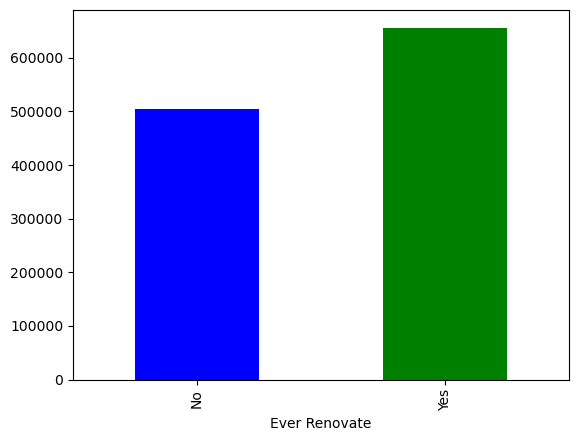

In [213]:
df.groupby("Ever Renovate")["Sale Price"].mean().sort_values().plot(kind = "bar", color=['blue', 'green'])

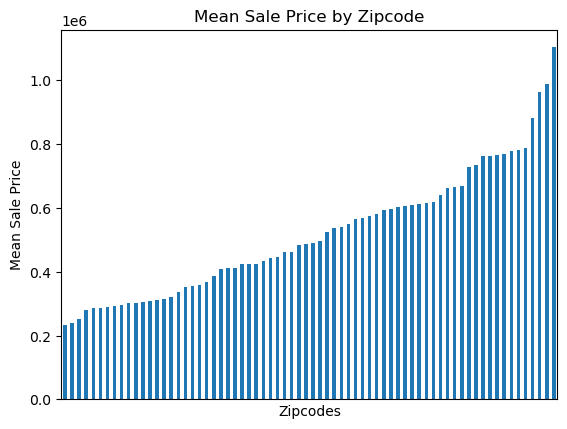

In [218]:
grouped_data = df.groupby("Zipcode")["Sale Price"].mean().sort_values()
grouped_data.plot(kind="bar")
plt.xticks([])
plt.xlabel("Zipcodes")
plt.ylabel("Mean Sale Price")
plt.title("Mean Sale Price by Zipcode")
plt.show()

In [166]:
df = df.drop("Ever Renovate", axis = 1)

In [167]:
df.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renocation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,4,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,0


In [168]:
zip_table = df.groupby("Zipcode").agg({"Sale Price" : "mean"}).sort_values("Sale Price")

In [169]:
zip_table.head()

,Sale Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [170]:
zip_table["Zipcode_Group"] = pd.cut(zip_table["Sale Price"], bins = 10,
                                   labels = ["zipcode_0",
                                            "zipcode_1",
                                            "zipcode_2",
                                            "zipcode_3",
                                            "zipcode_4",
                                            "zipcode_5",
                                            "zipcode_6",
                                            "zipcode_7",
                                            "zipcode_8",
                                            "zipcode_9"],
                                   include_lowest=True)

In [171]:
zip_table = zip_table.drop(columns = "Sale Price")

In [172]:
df = pd.merge(df,
              zip_table,
              left_on= "Zipcode",
              how = "left",
              right_index= True)

In [173]:
df = df.drop(columns = "Zipcode")

In [174]:
df.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renocation,Zipcode_Group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,zipcode_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,zipcode_2
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,zipcode_2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,4,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,zipcode_3
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,zipcode_4


In [101]:
df = pd.get_dummies(df,
                    columns = ["Zipcode_Group"],
                    drop_first=True)

In [102]:
df = df.drop(columns = "ID")

In [103]:
df.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renocation,Zipcode_Group_zipcode_1,Zipcode_Group_zipcode_2,Zipcode_Group_zipcode_3,Zipcode_Group_zipcode_4,Zipcode_Group_zipcode_5,Zipcode_Group_zipcode_6,Zipcode_Group_zipcode_7,Zipcode_Group_zipcode_8,Zipcode_Group_zipcode_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0,63,47.5112,-122.257,1340.0,5650,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400,67,47.7210,-122.319,1690.0,7639,26,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0,85,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,4,7,1050.0,910,53,47.5208,-122.393,1360.0,5000,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0,31,47.6168,-122.045,1800.0,7503,0,0,0,0,1,0,0,0,0,0


In [104]:
df['Waterfront View'] = df['Waterfront View'].astype('int64')
df['No of Times Visited'] = df['No of Times Visited'].astype('int64')
df['Condition of the House'] = df['Condition of the House'].astype('int64')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  int64  
 7   No of Times Visited                        21609 non-null  int64  
 8   Condition of the House                     21609 non-null  int64  
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

<Axes: >

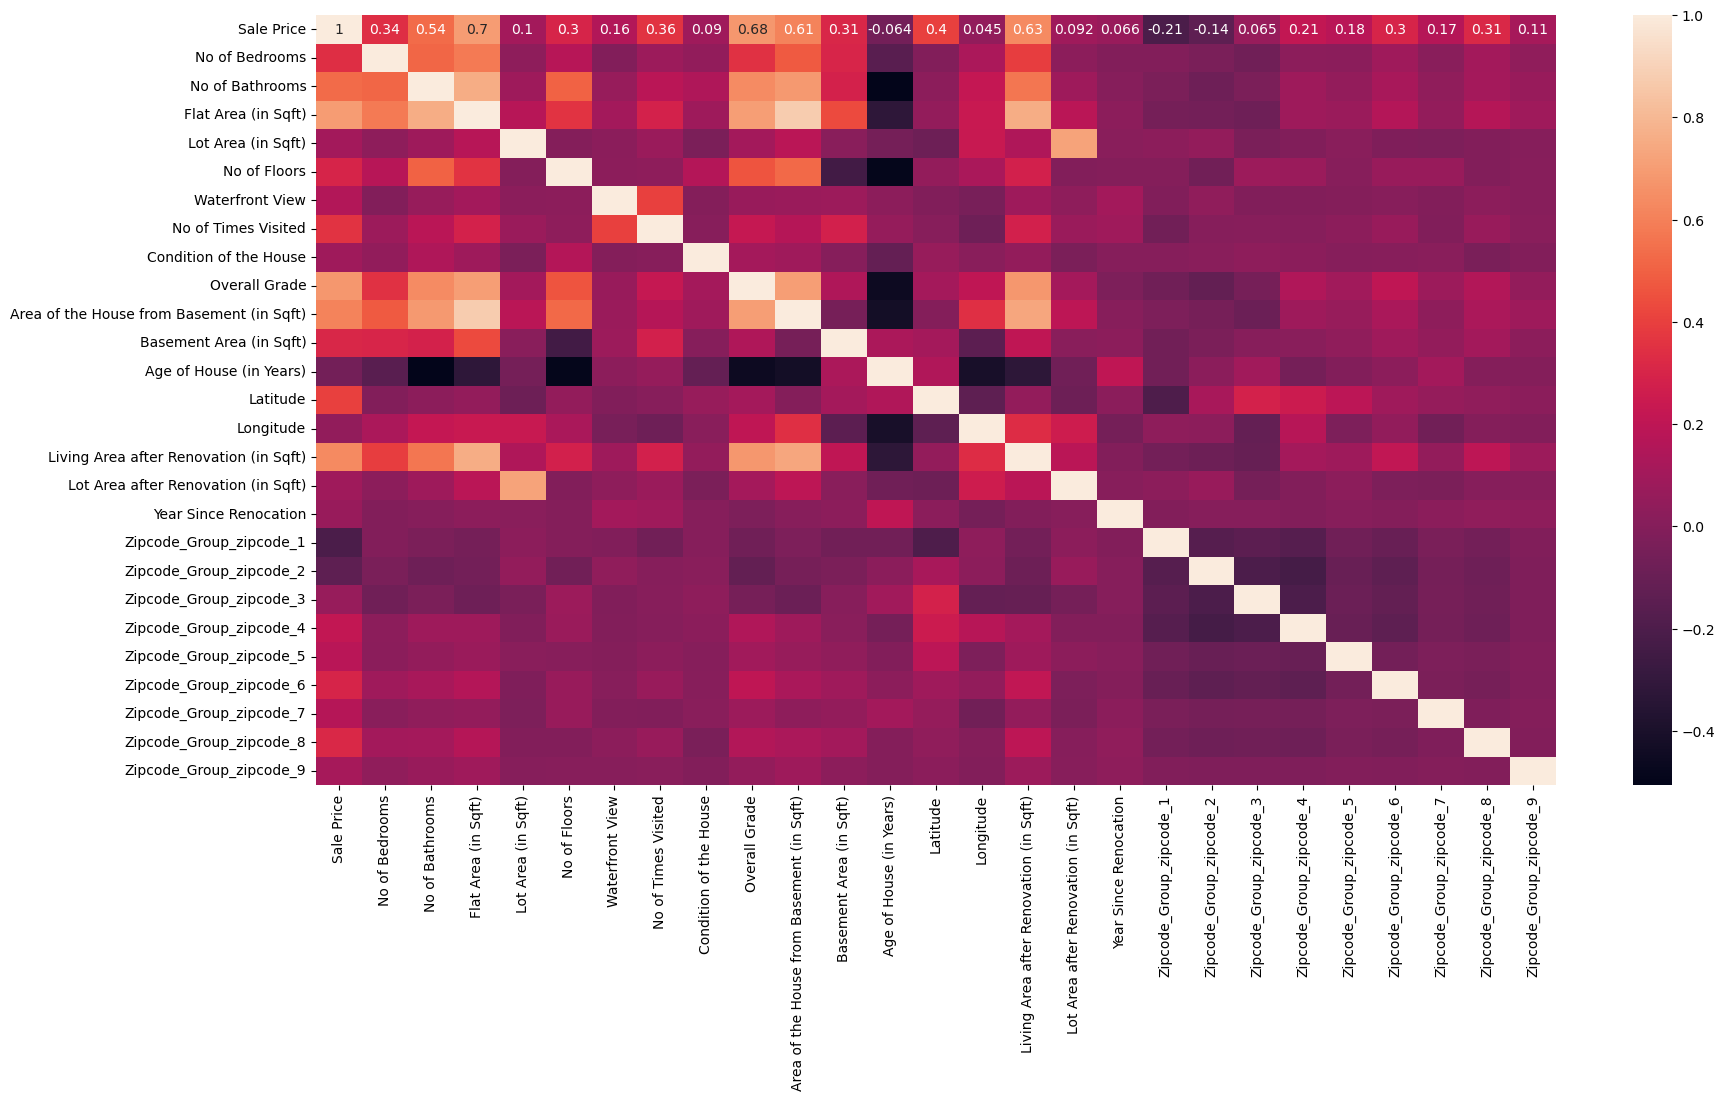

In [106]:
plt.figure(figsize= (20,10))
sns.heatmap(df.corr(), annot = True)

In [107]:
df = df.drop(columns = ["Age of House (in Years)", "Longitude", "Year Since Renocation"], axis = 1)

In [108]:
y = df["Sale Price"]
X = df.drop("Sale Price", axis = 1)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree

In [110]:
regressor = DecisionTreeRegressor(random_state = 0)

In [111]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [112]:
y_pred = regressor.predict(X_test)

In [113]:
y_test

4984     570000.0
10256    720001.0
4046     267000.0
21269    365000.0
10496    397000.0
           ...   
8943     852600.0
11301    128000.0
20765    770000.0
2524     175000.0
5003     699000.0
Name: Sale Price, Length: 4322, dtype: float64

In [116]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [118]:
y_pred = y_pred.reshape(-1,1)

In [222]:
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

R-squared: 0.8704132593716455


In [119]:
result = np.concatenate((y_test, y_pred), axis = 1)

In [120]:
result = pd.DataFrame(result, columns=['y_test', 'y_pred'])
result.head()

,y_test,y_pred
0,570000.0,499000.0
1,720001.0,642000.0
2,267000.0,196500.0
3,365000.0,385000.0
4,397000.0,499000.0


# Random Forest Regressor

In [223]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [224]:
y_pred = regressor.predict(X_test)
y_pred

array([534380., 651980., 219995., ..., 632600., 207340., 579700.])

In [225]:
y_pred = y_pred.reshape(-1,1)

In [226]:
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')

R-squared: 0.8704132593716455


In [227]:
result = np.concatenate((y_test, y_pred), axis = 1)
result = pd.DataFrame(result, columns=['y_test', 'y_pred'])
result.head()

,y_test,y_pred
0,570000.0,534380.0
1,720001.0,651980.0
2,267000.0,219995.0
3,365000.0,401250.0
4,397000.0,554600.0
